In [23]:
from itertools import product
from statistics import correlation

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import requests
import re
from bs4 import BeautifulSoup
#1)web sayfamızı  tam ekran yapıyoruz.
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(options)
#2)Verilerini kazımak istediğimiz kategorilerin elementlerini tek seferde XPATH ile yakalıyoruz.
SLEEP_TİME = 2
driver.get("https://books.toscrape.com/")
time.sleep(SLEEP_TİME)
category_elements_xpath = "//a[contains(text(),'Travel') or contains(text(),'Nonfiction')]"
#3)XPATH sorgusu ile yakaladığımız kazımak istediğmiz kategorilerin  elementlerini driver ı kullanarak buluyoruz ve detay linklerini  kazıyoruz.
category_elements  = driver.find_elements(By.XPATH,category_elements_xpath)
category_elements
category_urls = [element.get_attribute("href") for element  in category_elements]  #get.attribute metoduyla url yi kazıyoruz
print(category_urls)
#4)Kategori sayfalarını inceliyoruz ve kazıyoruz
driver.get(category_urls[0])
time.sleep(SLEEP_TİME)
book_elements_xpath = "//div[@class='image_container']//a"
book_elements = driver.find_elements(By.XPATH,book_elements_xpath)
book_urls = [element.get_attribute("herf") for element in book_elements]
print(book_urls)
print(len(book_urls))
#5)sayfalandrıma(pagination) için butonlara tıklamak yerine sayfa  linkini manipüle ediyoruz.
MAX_PAGINATION = 10
url = category_urls[1]
book_urls = []
for i in range (1,MAX_PAGINATION):
    update_url = url if i == 1 else url.replace("index",f"page-{i}")
    driver.get(update_url)
    book_elements = driver.find_elements(By.XPATH,book_elements_xpath)

    temp_urls = [element.get_attribute("href") for element in book_elements]
    book_urls.extend(temp_urls)
print(book_urls)
print(len(book_urls))
#6)Sayfalandırmada sonsuz döngüye girmemek adına kontrol kullanıyoruz.
MAX_PAGINATION = 10
url = category_urls[1]
book_urls = []
for i in range (1,MAX_PAGINATION):
    update_url = url if i == 1 else url.replace("index",f"page-{i}")
    driver.get(update_url)
    book_elements = driver.find_elements(By.XPATH,book_elements_xpath)
    if not book_elements:
        break
    temp_urls = [element.get_attribute("href") for element in book_elements]
    book_urls.extend(temp_urls)
print(book_urls)
print(len(book_urls))
#7)Ürün detay sayfasının kazınması
#ürün detay sayfasına gidip class attribute'ı content olan div elementini  yakalıyoruz.
driver.get(book_urls[0])
time.sleep(SLEEP_TİME)
content_div = driver.find_elements(By.XPATH, "//div[@class='content']")
inner_html = content_div[0].get_attribute("innerHTML")

soup = BeautifulSoup(inner_html,"html.parser")

name_elem = soup.find("h1")
book_name = name_elem.text
#kitap fiyatı
price_elem=soup.find("p",attrs={"class":"price_color"})
book_price = price_elem.text
#kitap yıldız sayısı
regex = re.compile('^star-rating')
star_elem = soup.find("p",attrs={"class":regex})
book_star_count = star_elem["class"][-1]
#kitap açıklaması
desc_elem = soup.find("div",attrs={"id":"product_description"}).find_next_sibling()
book_desc = desc_elem.text
#Product Information Başlığı altında kalan tablodaki bilgiler
product_info =  {}
table_rows = soup.find("table").find_all("tr")
for row in table_rows:
    key = row.find("th").text
    value = row.find("th").text
    product_info[key] = value

#8

['https://books.toscrape.com/catalogue/category/books/travel_2/index.html', 'https://books.toscrape.com/catalogue/category/books/nonfiction_13/index.html']
[None, None, None, None, None, None, None, None, None, None, None]
11
['https://books.toscrape.com/catalogue/worlds-elsewhere-journeys-around-shakespeares-globe_972/index.html', 'https://books.toscrape.com/catalogue/the-five-love-languages-how-to-express-heartfelt-commitment-to-your-mate_969/index.html', 'https://books.toscrape.com/catalogue/reasons-to-stay-alive_959/index.html', 'https://books.toscrape.com/catalogue/higherselfie-wake-up-your-life-free-your-soul-find-your-tribe_957/index.html', 'https://books.toscrape.com/catalogue/unseen-city-the-majesty-of-pigeons-the-discreet-charm-of-snails-other-wonders-of-the-urban-wilderness_952/index.html', 'https://books.toscrape.com/catalogue/throwing-rocks-at-the-google-bus-how-growth-became-the-enemy-of-prosperity_948/index.html', 'https://books.toscrape.com/catalogue/the-life-changing-m

In [24]:
product_info

{'UPC': 'UPC',
 'Product Type': 'Product Type',
 'Price (excl. tax)': 'Price (excl. tax)',
 'Price (incl. tax)': 'Price (incl. tax)',
 'Tax': 'Tax',
 'Availability': 'Availability',
 'Number of reviews': 'Number of reviews'}

In [25]:
price_elem

<p class="price_color">£40.30</p>

In [26]:
desc_elem

<p>Anti-apartheid activist, Bollywood screenwriter, Nazi pin-up, hero of the Wild West: this is Shakespeare as you have never seen him before.From the sixteenth-century Baltic to the American Revolution, from colonial India to the skyscrapers of modern-day Shanghai, Shakespeare’s plays appear at the most fascinating of times and in the most unexpected of places. No other writ Anti-apartheid activist, Bollywood screenwriter, Nazi pin-up, hero of the Wild West: this is Shakespeare as you have never seen him before.From the sixteenth-century Baltic to the American Revolution, from colonial India to the skyscrapers of modern-day Shanghai, Shakespeare’s plays appear at the most fascinating of times and in the most unexpected of places. No other writer’s work has been performed, translated, adapted and altered in such a remarkable variety of cultures and languages. But what is it about William Shakespeare – a man from Warwickshire who never once set foot outside England – that has made him a

In [27]:
regex

re.compile(r'^star-rating', re.UNICODE)

In [1]:
import time
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re

SLEEP_TIME = 0.25  # Hata düzeltilmiş

# WebDriver başlatma fonksiyonu
def initialize_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    driver = webdriver.Chrome(options=options)
    return driver

# Kategori URL'lerini alma fonksiyonu
def get_travel_and_nonfiction_category_urls(driver, url):
    driver.get(url)
    time.sleep(SLEEP_TIME)

    category_elements_xpath = "//a[contains(text(),'Travel') or contains(text(),'Nonfiction')]"
    category_elements = driver.find_elements(By.XPATH, category_elements_xpath)
    category_urls = [element.get_attribute("href") for element in category_elements]

    return category_urls

# Kitap URL'lerini alma fonksiyonu
def get_book_urls(driver, url):
    MAX_PAGINATION = 3
    book_urls = []
    book_elements_xpath = "//div[@class='image_container']//a"

    for i in range(1, MAX_PAGINATION + 1):
        updated_url = url if i == 1 else url.replace("index", f"page-{i}")
        driver.get(updated_url)
        time.sleep(SLEEP_TIME)

        book_elements = driver.find_elements(By.XPATH, book_elements_xpath)

        # Eğer kitap bulunamazsa döngüyü kır
        if not book_elements:
            break

        temp_urls = [element.get_attribute("href") for element in book_elements]
        book_urls.extend(temp_urls)

    return book_urls

# Kitap detaylarını alma fonksiyonu
def get_book_detail(driver, url):
    driver.get(url)
    time.sleep(SLEEP_TIME)

    try:
        content_div = driver.find_element(By.XPATH, "//div[@class='content']")
        inner_html = content_div.get_attribute("innerHTML")  # Liste hatası düzeltildi
    except:
        return None  # Hata durumunda None döndür

    soup = BeautifulSoup(inner_html, "html.parser")

    # Kitap adı
    name_elem = soup.find("h1")
    book_name = name_elem.text if name_elem else "No Title"

    # Kitap fiyatı
    price_elem = soup.find("p", class_="price_color")
    book_price = price_elem.text if price_elem else "No Price"

    # Yıldız derecelendirme
    regex = re.compile('^star-rating')
    star_elem = soup.find("p", class_=regex)
    book_star_count = star_elem["class"][-1] if star_elem else "No Rating"

    # Açıklama
    desc_elem = soup.find("div", attrs={"id": "product_description"})
    book_desc = desc_elem.find_next_sibling().text if desc_elem else "No Description"

    # Ürün bilgileri
    product_info = {}
    table_rows = soup.find("table").find_all("tr")
    for row in table_rows:
        key = row.find("th").text
        value = row.find("td").text  # Hatalı değer düzeltildi
        product_info[key] = value

    return {
        'book_name': book_name,
        'book_price': book_price,
        'book_star_count': book_star_count,
        'book_desc': book_desc,
        **product_info
    }

# Ana fonksiyon
def main():
    BASE_URL = "https://books.toscrape.com/"
    driver = initialize_driver()
    category_urls = get_travel_and_nonfiction_category_urls(driver, BASE_URL)

    data = []
    for cat_url in category_urls:
        book_urls = get_book_urls(driver, cat_url)
        for book_url in book_urls:
            book_data = get_book_detail(driver, book_url)
            if book_data:
                book_data["category_url"] = cat_url
                data.append(book_data)

    driver.quit()  # WebDriver'ı kapatma

    df = pd.DataFrame(data)

    return df

# Kod çalıştırma
df = main()
df1 = df
df.to_csv("books.csv")

# DataFrame'i görüntüleme
print(df.head())
print(df.tail())
print(df.shape)
df

                                           book_name book_price  \
0                            It's Only the Himalayas     £45.17   
1  Full Moon over Noah’s Ark: An Odyssey to Mount...     £49.43   
2  See America: A Celebration of Our National Par...     £48.87   
3  Vagabonding: An Uncommon Guide to the Art of L...     £36.94   
4                               Under the Tuscan Sun     £37.33   

  book_star_count                                          book_desc  \
0             Two  “Wherever you go, whatever you do, just . . . ...   
1            Four  Acclaimed travel writer Rick Antonson sets his...   
2           Three  To coincide with the 2016 centennial anniversa...   
3             Two  With a new foreword by Tim Ferriss •There’s no...   
4           Three  A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...   

                UPC Product Type Price (excl. tax) Price (incl. tax)    Tax  \
0  a22124811bfa8350        Books            £45.17            £45.17  £0.00   
1  ce6

,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
0,It's Only the Himalayas,£45.17,Two,"“Wherever you go, whatever you do, just . . . ...",a22124811bfa8350,Books,£45.17,£45.17,£0.00,In stock (19 available),0,https://books.toscrape.com/catalogue/category/...
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,£49.43,Four,Acclaimed travel writer Rick Antonson sets his...,ce60436f52c5ee68,Books,£49.43,£49.43,£0.00,In stock (15 available),0,https://books.toscrape.com/catalogue/category/...
2,See America: A Celebration of Our National Par...,£48.87,Three,To coincide with the 2016 centennial anniversa...,f9705c362f070608,Books,£48.87,£48.87,£0.00,In stock (14 available),0,https://books.toscrape.com/catalogue/category/...
3,Vagabonding: An Uncommon Guide to the Art of L...,£36.94,Two,With a new foreword by Tim Ferriss •There’s no...,1809259a5a5f1d8d,Books,£36.94,£36.94,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
4,Under the Tuscan Sun,£37.33,Three,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,a94350ee74deaa07,Books,£37.33,£37.33,£0.00,In stock (7 available),0,https://books.toscrape.com/catalogue/category/...
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Man's Search for Meaning,£29.48,Three,Psychiatrist Viktor Frankl's memoir has rivete...,4729afff3bea0f0a,Books,£29.48,£29.48,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
67,"Love That Boy: What Two Presidents, Eight Road...",£25.06,Two,"Tyler and I inch toward the Green Room, in lin...",4d3a4c7b442a9a4e,Books,£25.06,£25.06,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
68,Living Forward: A Proven Plan to Stop Drifting...,£12.55,Three,Each of us has but one life to live on this ea...,044534b0b28b4e87,Books,£12.55,£12.55,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
69,I Will Find You,£44.21,One,“This is it. My rape. I knew it was coming. Ev...,bbf1ea50be8008ab,Books,£44.21,£44.21,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...


Travel ve Nonfiction Kategorilerindeki Kitaplar İçin Keşifsel Veri Analizi

In [3]:
#Kütüphanler
import pandas as  pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VERİ SETİ İNCELEME

In [4]:
#VERİ SETİNE GENEL BAKIŞ
def veritanıma(dataframe,head=True):
    print("---------------------------------------SHAPE----------------------------------------------------------")
    print(dataframe.shape)
    print("---------------------------------------İNFO-----------------------------------------------------------")
    print(dataframe.info())
    print("---------------------------------------İSNULL---------------------------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("---------------------------------------NUNİQUE--------------------------------------------------------")
    print(dataframe.nunique())
    print("---------------------------------------DESCİRİBE------------------------------------------------------")
    display(dataframe.describe())
    if head:
        print("-----------------------------------HEAD-----------------------------------------------------------")
        display(dataframe.head())
        print("-----------------------------------TAİL-----------------------------------------------------------")
        display(dataframe.tail())


In [5]:
veritanıma(df1,head=True)

---------------------------------------SHAPE----------------------------------------------------------
(71, 12)
---------------------------------------İNFO-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   book_name          71 non-null     object
 1   book_price         71 non-null     object
 2   book_star_count    71 non-null     object
 3   book_desc          71 non-null     object
 4   UPC                71 non-null     object
 5   Product Type       71 non-null     object
 6   Price (excl. tax)  71 non-null     object
 7   Price (incl. tax)  71 non-null     object
 8   Tax                71 non-null     object
 9   Availability       71 non-null     object
 10  Number of reviews  71 non-null     object
 11  category_url       71 non-null     object
dtypes: object(12)
memor

,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
count,71,71,71,71,71,71,71,71,71,71,71,71
unique,71,70,5,71,71,1,70,70,1,16,1,2
top,It's Only the Himalayas,£29.14,Two,"“Wherever you go, whatever you do, just . . . ...",a22124811bfa8350,Books,£29.14,£29.14,£0.00,In stock (14 available),0,https://books.toscrape.com/catalogue/category/...
freq,1,2,19,1,1,71,2,2,71,16,71,60


-----------------------------------HEAD-----------------------------------------------------------


,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
0,It's Only the Himalayas,£45.17,Two,"“Wherever you go, whatever you do, just . . . ...",a22124811bfa8350,Books,£45.17,£45.17,£0.00,In stock (19 available),0,https://books.toscrape.com/catalogue/category/...
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,£49.43,Four,Acclaimed travel writer Rick Antonson sets his...,ce60436f52c5ee68,Books,£49.43,£49.43,£0.00,In stock (15 available),0,https://books.toscrape.com/catalogue/category/...
2,See America: A Celebration of Our National Par...,£48.87,Three,To coincide with the 2016 centennial anniversa...,f9705c362f070608,Books,£48.87,£48.87,£0.00,In stock (14 available),0,https://books.toscrape.com/catalogue/category/...
3,Vagabonding: An Uncommon Guide to the Art of L...,£36.94,Two,With a new foreword by Tim Ferriss •There’s no...,1809259a5a5f1d8d,Books,£36.94,£36.94,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
4,Under the Tuscan Sun,£37.33,Three,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,a94350ee74deaa07,Books,£37.33,£37.33,£0.00,In stock (7 available),0,https://books.toscrape.com/catalogue/category/...


-----------------------------------TAİL-----------------------------------------------------------


,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
66,Man's Search for Meaning,£29.48,Three,Psychiatrist Viktor Frankl's memoir has rivete...,4729afff3bea0f0a,Books,£29.48,£29.48,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
67,"Love That Boy: What Two Presidents, Eight Road...",£25.06,Two,"Tyler and I inch toward the Green Room, in lin...",4d3a4c7b442a9a4e,Books,£25.06,£25.06,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
68,Living Forward: A Proven Plan to Stop Drifting...,£12.55,Three,Each of us has but one life to live on this ea...,044534b0b28b4e87,Books,£12.55,£12.55,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
69,I Will Find You,£44.21,One,“This is it. My rape. I knew it was coming. Ev...,bbf1ea50be8008ab,Books,£44.21,£44.21,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
70,Brazen: The Courage to Find the You That's Bee...,£19.22,Two,There are so many moments in life when we choo...,77e9ea355bd8ae57,Books,£19.22,£19.22,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...


In [6]:
#VERİ MANİPİLASYONU
df1['book_price'] = df['book_price'].replace({'£': '','$': '',',': ''},regex=True)
df1['book_price'] = pd.to_numeric(df['book_price'],errors='coerce')


In [7]:
df1.head()

,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
0,It's Only the Himalayas,45.17,Two,"“Wherever you go, whatever you do, just . . . ...",a22124811bfa8350,Books,£45.17,£45.17,£0.00,In stock (19 available),0,https://books.toscrape.com/catalogue/category/...
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,Four,Acclaimed travel writer Rick Antonson sets his...,ce60436f52c5ee68,Books,£49.43,£49.43,£0.00,In stock (15 available),0,https://books.toscrape.com/catalogue/category/...
2,See America: A Celebration of Our National Par...,48.87,Three,To coincide with the 2016 centennial anniversa...,f9705c362f070608,Books,£48.87,£48.87,£0.00,In stock (14 available),0,https://books.toscrape.com/catalogue/category/...
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94,Two,With a new foreword by Tim Ferriss •There’s no...,1809259a5a5f1d8d,Books,£36.94,£36.94,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
4,Under the Tuscan Sun,37.33,Three,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,a94350ee74deaa07,Books,£37.33,£37.33,£0.00,In stock (7 available),0,https://books.toscrape.com/catalogue/category/...


In [8]:
df['book_price'].head()

0    45.17
1    49.43
2    48.87
3    36.94
4    37.33
Name: book_price, dtype: float64

In [9]:
#VERİ GÖRSELLEŞTİRME
nümeric_columns = [df.select_dtypes(include=['int64','float64'])]
categorical_columns = [df.select_dtypes(include=['object','category'])]

In [10]:
print(nümeric_columns)

[    book_price
0        45.17
1        49.43
2        48.87
3        36.94
4        37.33
..         ...
66       29.48
67       25.06
68       12.55
69       44.21
70       19.22

[71 rows x 1 columns]]


In [11]:
categorical_columns

[                                            book_name book_star_count  \
 0                             It's Only the Himalayas             Two   
 1   Full Moon over Noah’s Ark: An Odyssey to Mount...            Four   
 2   See America: A Celebration of Our National Par...           Three   
 3   Vagabonding: An Uncommon Guide to the Art of L...             Two   
 4                                Under the Tuscan Sun           Three   
 ..                                                ...             ...   
 66                           Man's Search for Meaning           Three   
 67  Love That Boy: What Two Presidents, Eight Road...             Two   
 68  Living Forward: A Proven Plan to Stop Drifting...           Three   
 69                                    I Will Find You             One   
 70  Brazen: The Courage to Find the You That's Bee...             Two   
 
                                             book_desc               UPC  \
 0   “Wherever you go, whatever yo

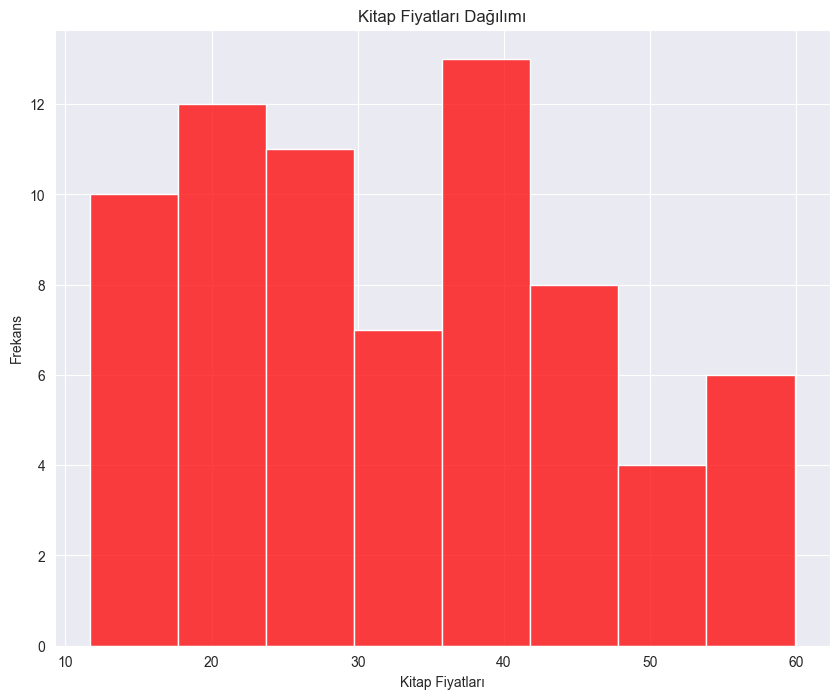

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(df1,x=df1['book_price'],color='red')
plt.title("Kitap Fiyatları Dağılımı")
plt.xlabel("Kitap Fiyatları")
plt.ylabel("Frekans")
plt.show()

In [18]:
#"book_star_count" Değişkenine Encode İşlemi Yapıyoruz sayısal  bir değer olmasına  rağmen "object" olarak sınıflandırılmış.
df1['book_star_count'].unique()

array(['Two', 'Four', 'Three', 'One', 'Five'], dtype=object)

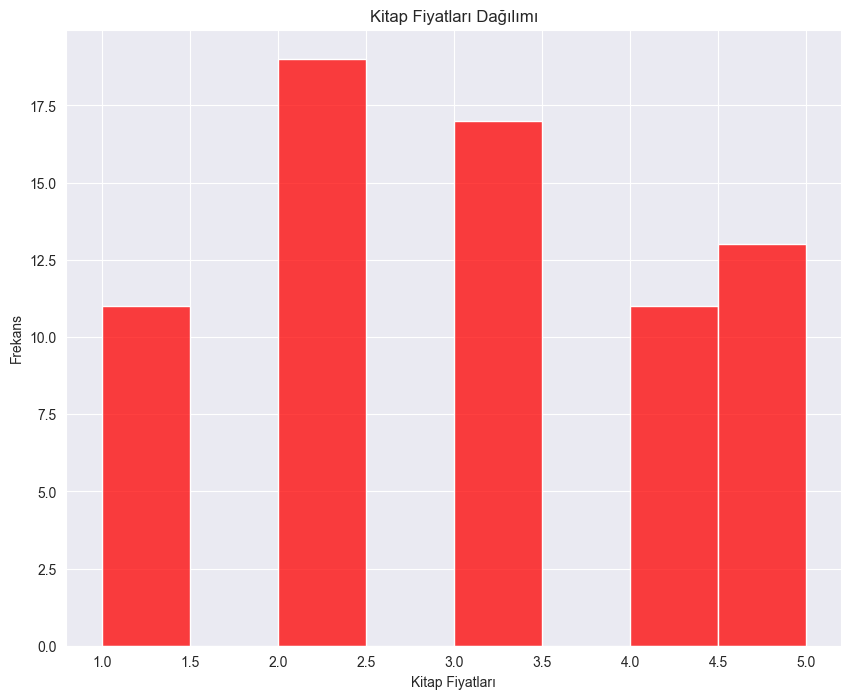

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(df1,x=df1['book_star_count'],color='red')
plt.title("Kitap Fiyatları Dağılımı")
plt.xlabel("Kitap Fiyatları")
plt.ylabel("Frekans")
plt.show()

In [19]:
star_mapping = {'One':1,'Two':2,'Three':3,'Four':4,'Five':5}
df1['book_star_count']=df1['book_star_count'].map(star_mapping)
df1['book_star_count'].unique()

array([2, 4, 3, 1, 5])

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_name          71 non-null     object 
 1   book_price         71 non-null     float64
 2   book_star_count    71 non-null     int64  
 3   book_desc          71 non-null     object 
 4   UPC                71 non-null     object 
 5   Product Type       71 non-null     object 
 6   Price (excl. tax)  71 non-null     object 
 7   Price (incl. tax)  71 non-null     object 
 8   Tax                71 non-null     object 
 9   Availability       71 non-null     object 
 10  Number of reviews  71 non-null     object 
 11  category_url       71 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 6.8+ KB


In [50]:
nümeric_columns = df1.select_dtypes(include=['int64','float64']).columns
categorical_columns = df1.select_dtypes(include=['object','category'])

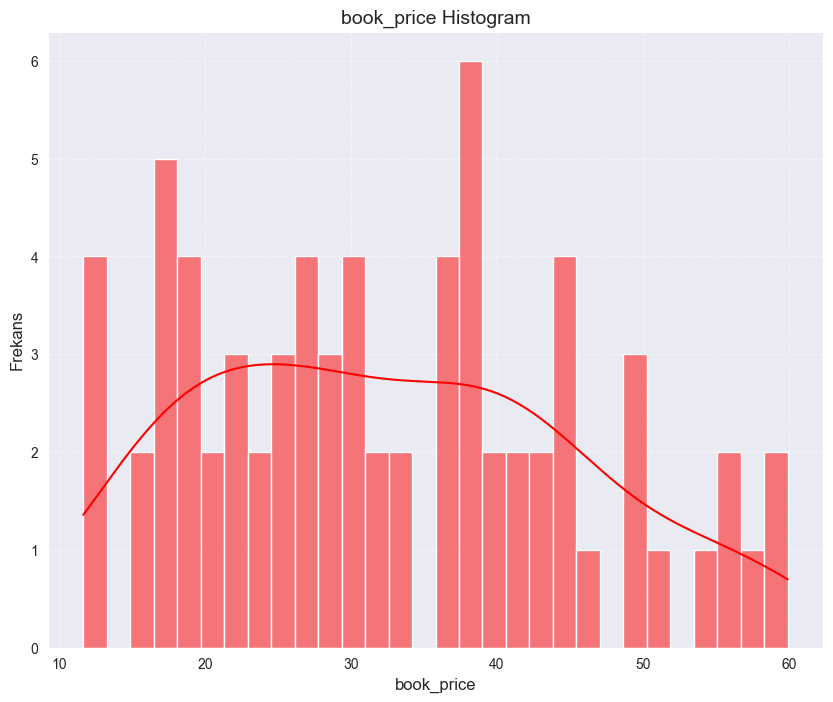

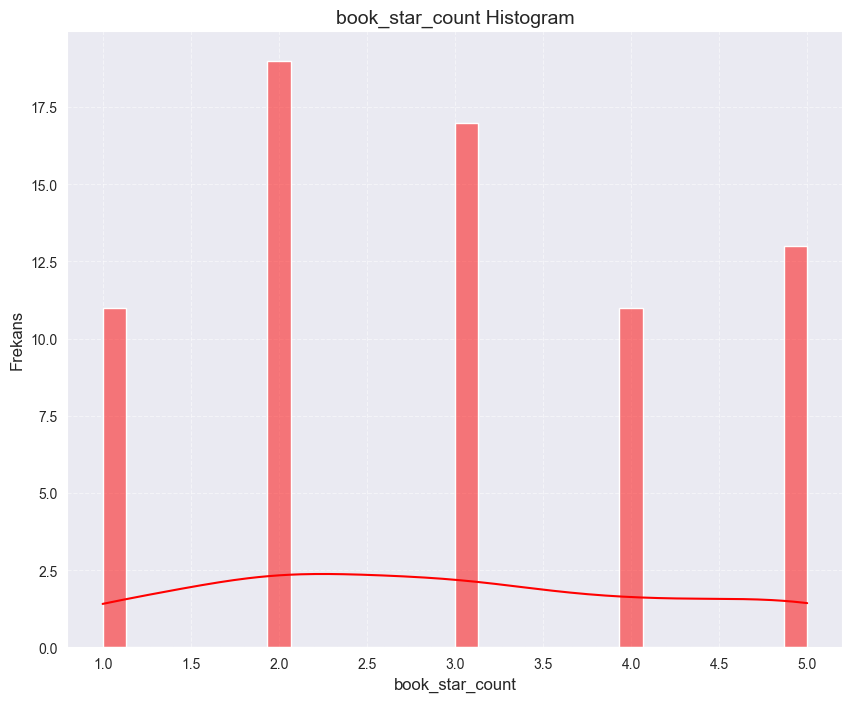

In [55]:
# Histogram çizimi
for col in nümeric_columns:
    plt.figure(figsize=(10, 8))

    # NaN ve sonsuz değerleri temizle
    clean_data = df1[col].replace([np.inf, -np.inf], np.nan).dropna()

    if clean_data.notnull().sum() > 0:
        sns.histplot(clean_data, color='red', bins=30, kde=True)
        plt.title(f"{col} Histogram", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frekans", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()
    else:
        print(f"{col} sütunu boş, histogram çizilemiyor.")


In [56]:
df1

,book_name,book_price,book_star_count,book_desc,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,category_url
0,It's Only the Himalayas,45.17,2,"“Wherever you go, whatever you do, just . . . ...",a22124811bfa8350,Books,£45.17,£45.17,£0.00,In stock (19 available),0,https://books.toscrape.com/catalogue/category/...
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,4,Acclaimed travel writer Rick Antonson sets his...,ce60436f52c5ee68,Books,£49.43,£49.43,£0.00,In stock (15 available),0,https://books.toscrape.com/catalogue/category/...
2,See America: A Celebration of Our National Par...,48.87,3,To coincide with the 2016 centennial anniversa...,f9705c362f070608,Books,£48.87,£48.87,£0.00,In stock (14 available),0,https://books.toscrape.com/catalogue/category/...
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94,2,With a new foreword by Tim Ferriss •There’s no...,1809259a5a5f1d8d,Books,£36.94,£36.94,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
4,Under the Tuscan Sun,37.33,3,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,a94350ee74deaa07,Books,£37.33,£37.33,£0.00,In stock (7 available),0,https://books.toscrape.com/catalogue/category/...
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Man's Search for Meaning,29.48,3,Psychiatrist Viktor Frankl's memoir has rivete...,4729afff3bea0f0a,Books,£29.48,£29.48,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
67,"Love That Boy: What Two Presidents, Eight Road...",25.06,2,"Tyler and I inch toward the Green Room, in lin...",4d3a4c7b442a9a4e,Books,£25.06,£25.06,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
68,Living Forward: A Proven Plan to Stop Drifting...,12.55,3,Each of us has but one life to live on this ea...,044534b0b28b4e87,Books,£12.55,£12.55,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...
69,I Will Find You,44.21,1,“This is it. My rape. I knew it was coming. Ev...,bbf1ea50be8008ab,Books,£44.21,£44.21,£0.00,In stock (8 available),0,https://books.toscrape.com/catalogue/category/...


Kitap Kategorileri İçin Keşifsel Veri Analiz(EDA)

In [59]:
kitap_fiyatları = df1.groupby("book_name",as_index=False)["book_price"].mean().sort_values(by="book_price",ascending=False).head(10)

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_25232\523514716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="book_name",y="book_price",data=kitap_fiyatları,palette="cividis")


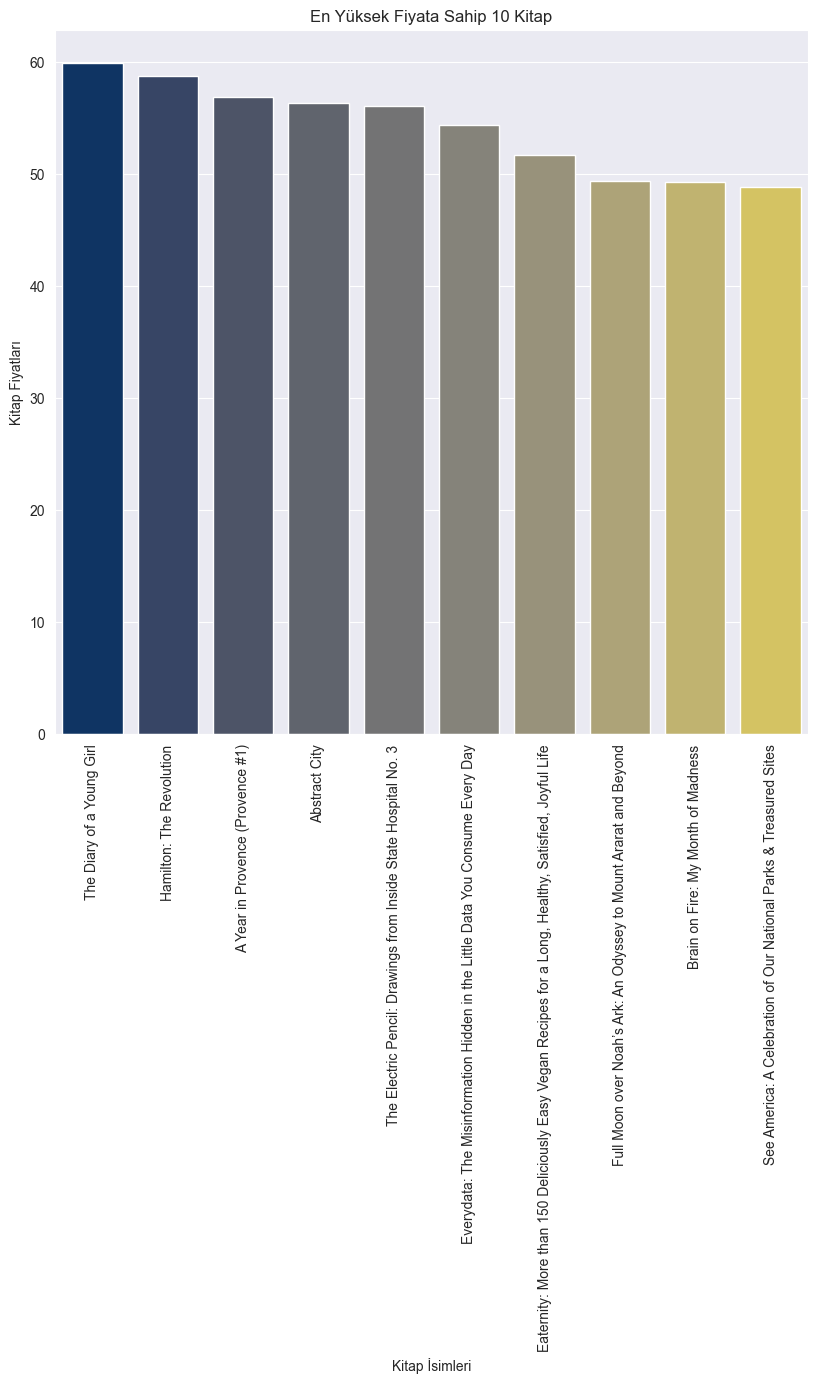

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x="book_name",y="book_price",data=kitap_fiyatları,palette="cividis")
plt.title("En Yüksek Fiyata Sahip 10 Kitap")
plt.xlabel("Kitap İsimleri")
plt.ylabel("Kitap Fiyatları")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_25232\924392162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="book_name",y="book_price",data=en_düşük_kitap_fiyatları,palette="cividis")


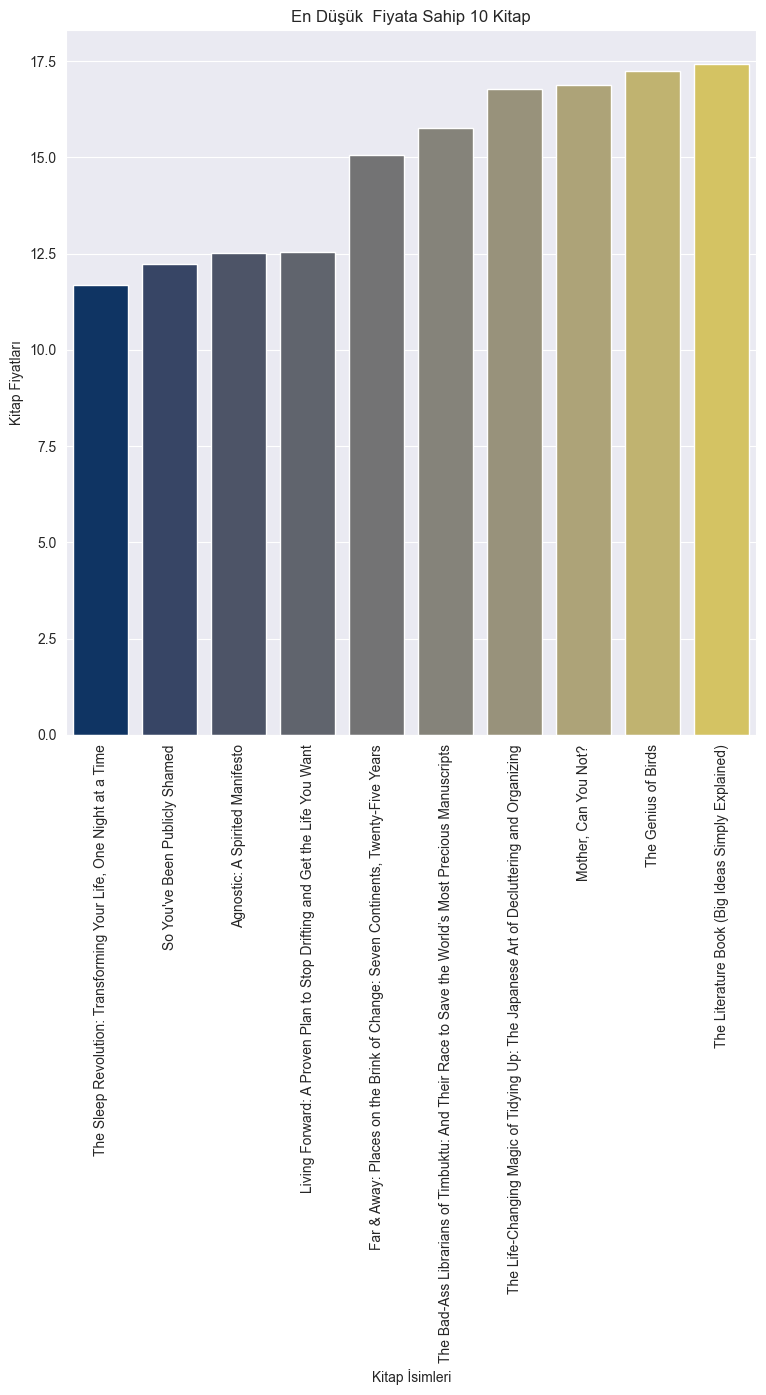

In [70]:
en_düşük_kitap_fiyatları = df1.groupby("book_name",as_index=False)["book_price"].mean().sort_values(by="book_price",ascending=True).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x="book_name",y="book_price",data=en_düşük_kitap_fiyatları,palette="cividis")
plt.title("En Düşük  Fiyata Sahip 10 Kitap")
plt.xlabel("Kitap İsimleri")
plt.ylabel("Kitap Fiyatları")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_25232\1036271466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="book_name",y="book_star_count",data=kitap_yıldızlanma_oranı,palette="magma")


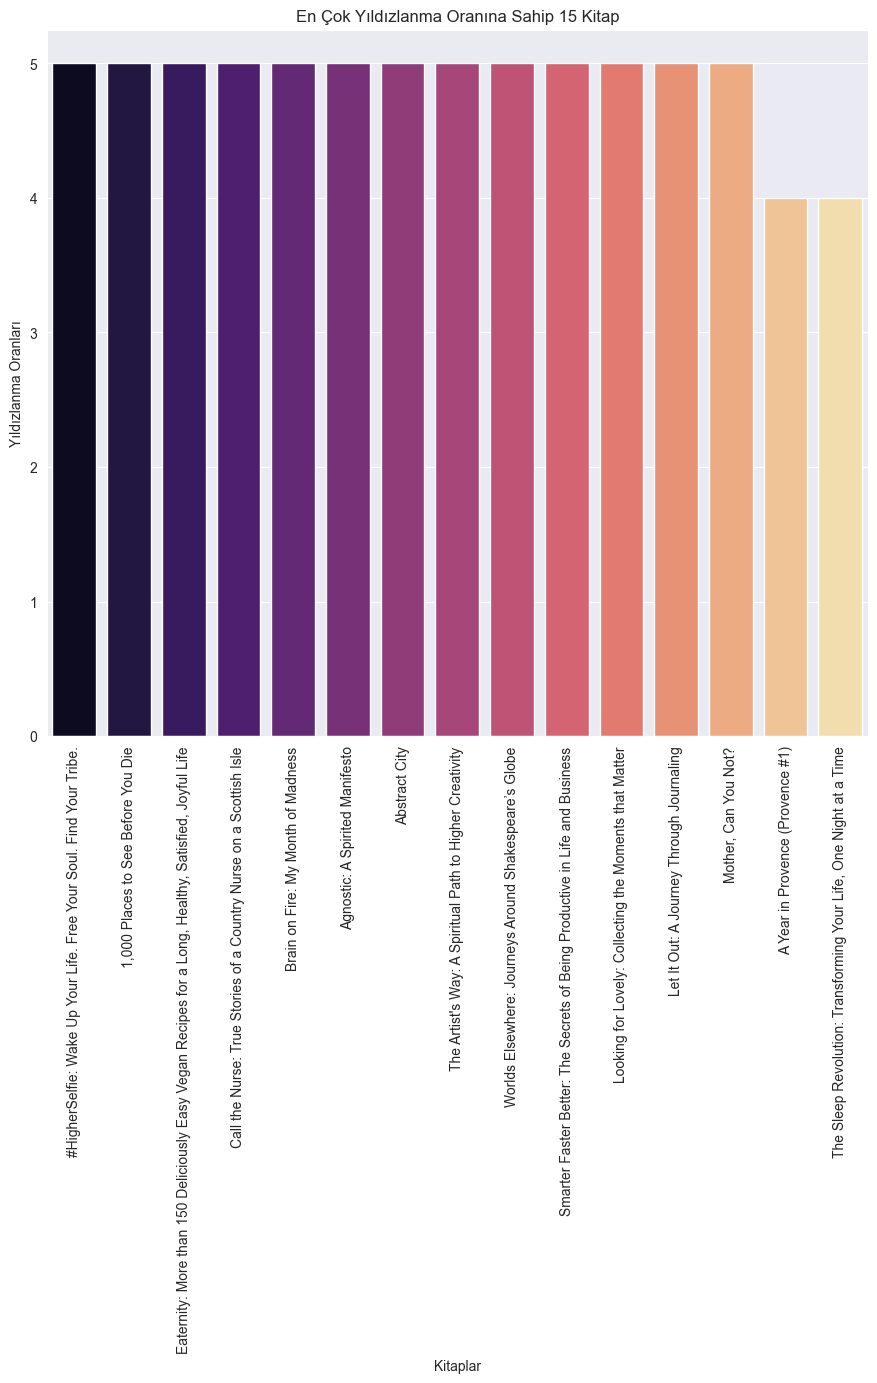

In [85]:
kitap_yıldızlanma_oranı = df1.groupby("book_name",as_index=False)["book_star_count"].mean().sort_values(by="book_star_count",ascending=False).head(15)
plt.figure(figsize=(12,8))
sns.barplot(x="book_name",y="book_star_count",data=kitap_yıldızlanma_oranı,palette="magma")
plt.title("En Çok Yıldızlanma Oranına Sahip 15 Kitap")
plt.xlabel("Kitaplar")
plt.ylabel("Yıldızlanma Oranları")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_25232\1619354687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="book_name",y="book_star_count",data=kitap_yıldızlanma_oranı2,palette="magma")


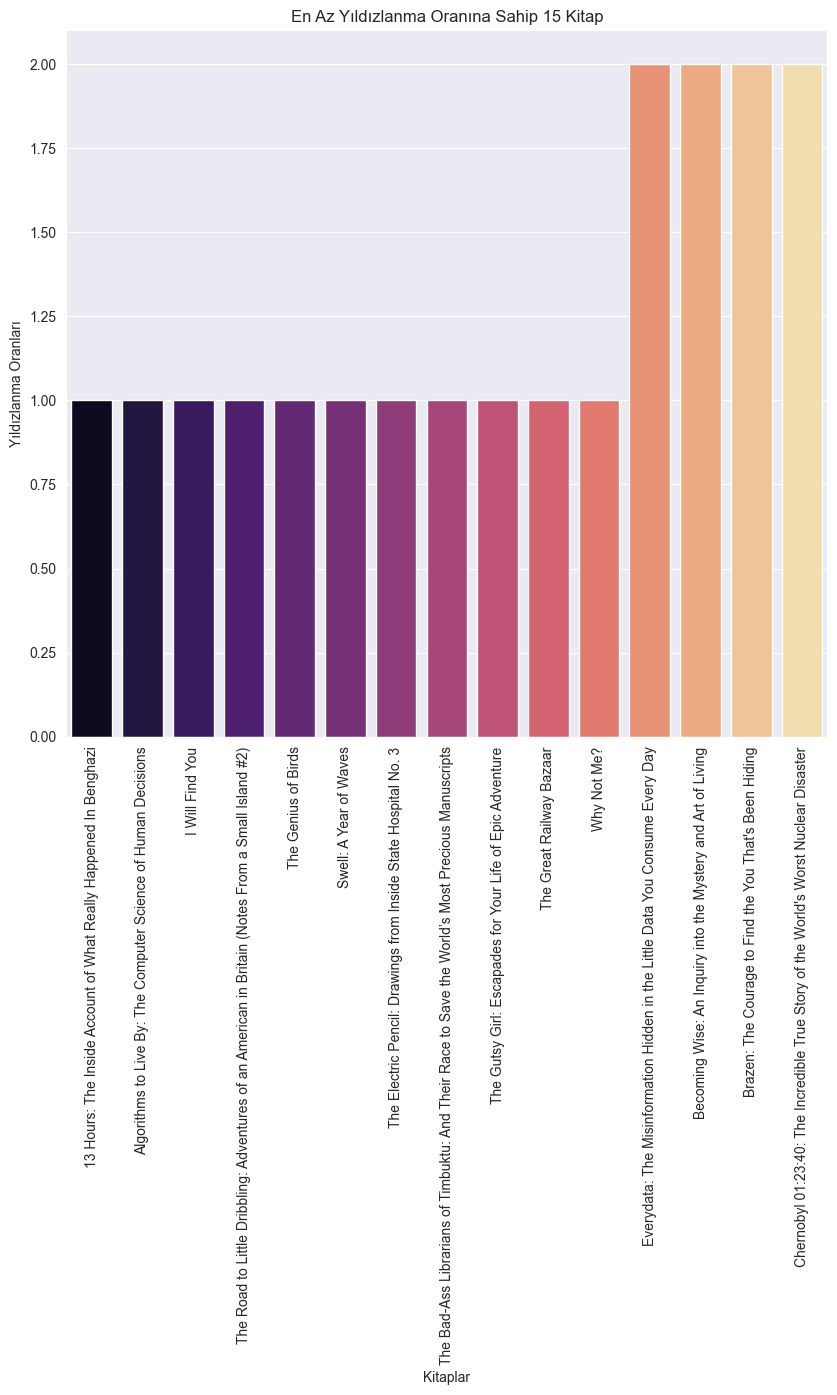

In [84]:
kitap_yıldızlanma_oranı2 = df1.groupby("book_name",as_index=False)["book_star_count"].mean().sort_values(by="book_star_count",ascending=True.head(15)
plt.figure(figsize=(12,8))
sns.barplot(x="book_name",y="book_star_count",data=kitap_yıldızlanma_oranı2,palette="magma")
plt.title("En Az Yıldızlanma Oranına Sahip 15 Kitap")
plt.xlabel("Kitaplar")
plt.ylabel("Yıldızlanma Oranları")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

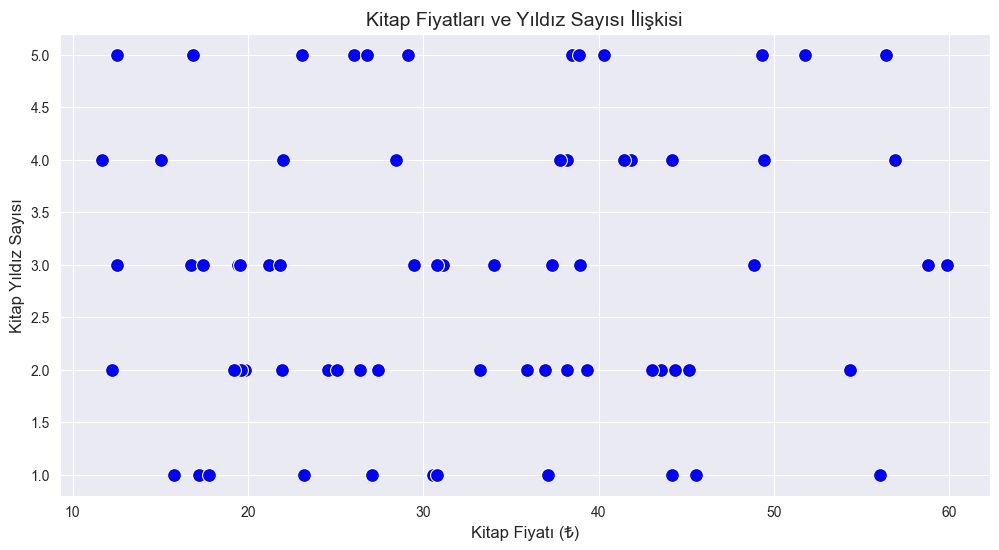

In [86]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="book_price", y="book_star_count", data=df1, color='blue', s=100)
plt.title("Kitap Fiyatları ve Yıldız Sayısı İlişkisi", fontsize=14)
plt.xlabel("Kitap Fiyatı (₺)", fontsize=12)
plt.ylabel("Kitap Yıldız Sayısı", fontsize=12)
plt.grid(True)
plt.show()


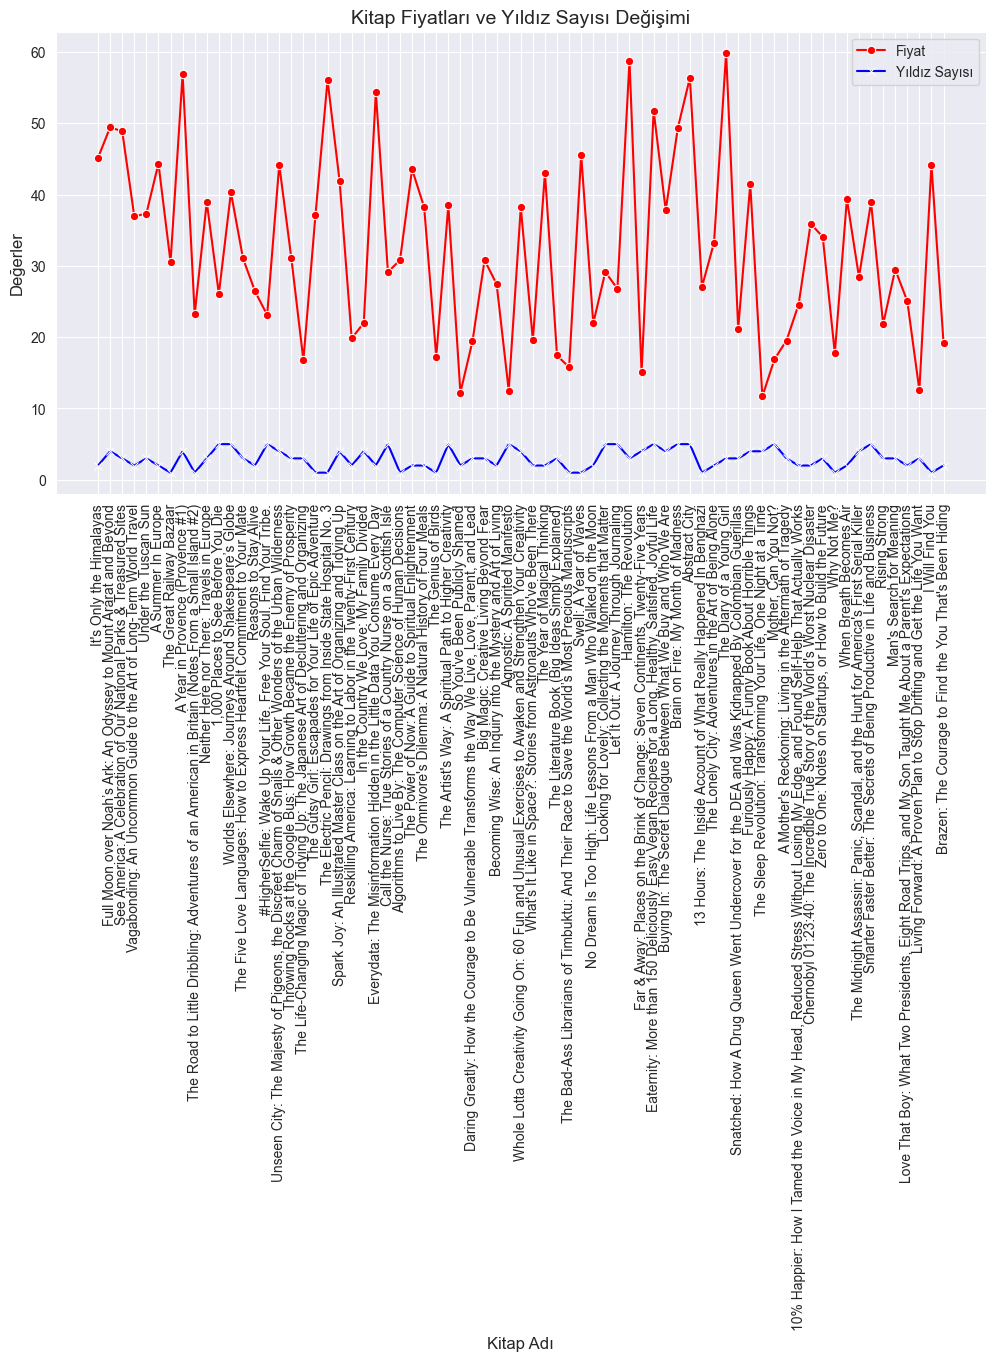

In [87]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="book_name", y="book_price", data=df1, label="Fiyat", color='red', marker="o")
sns.lineplot(x="book_name", y="book_star_count", data=df1, label="Yıldız Sayısı", color='blue', marker="x")
plt.title("Kitap Fiyatları ve Yıldız Sayısı Değişimi", fontsize=14)
plt.xlabel("Kitap Adı", fontsize=12)
plt.ylabel("Değerler", fontsize=12)
plt.legend()
plt.xticks(rotation=90)  # Kitap adlarının daha rahat okunması için
plt.grid(True)
plt.show()


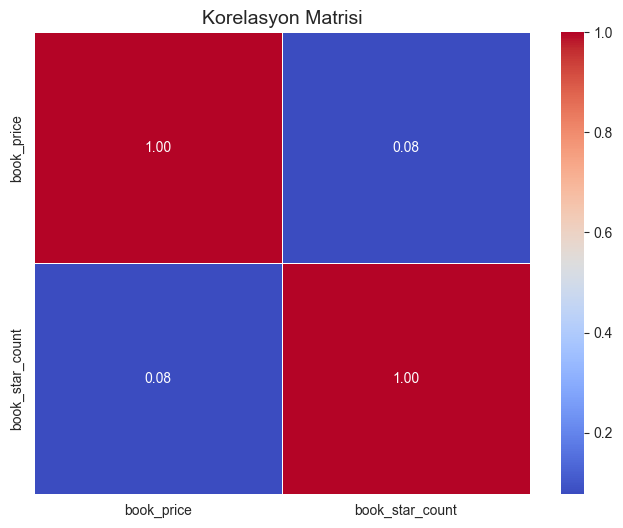

In [92]:

# Korelasyon matrisini hesaplıyoruz
corr_matrix = df1[nümeric_columns].corr()

# Korelasyon matrisini görselleştiriyoruz
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Korelasyon Matrisi", fontsize=14)
plt.show()


korelasyon değeri 0.08 olduğu için, bu iki değişken arasındaki ilişki çok zayıf demektir. Yani book_price ile book_star_count arasında neredeyse hiç ilişki yok denebilir. Bu, fiyat ile yıldız sayısı arasında belirgin bir bağlantı olmadığını gösterir.korelasyon nedensellik aramaz o yüzden  bu  iki değişken  için kitapların yıldızlanma oranlarıyla  satış fiyatları arasında  doğrusal bir  bağlantı yok diyebiliriz.